In [57]:
import cv2
import numpy as np
from homography import apply_homography
from matplotlib import pyplot as plt
from scipy.spatial import distance as dist

# Read Image

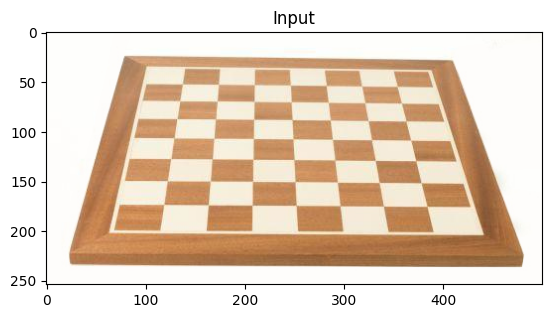

In [58]:
img = cv2.imread("../images/mb9544_jpg.rf.eea1cb4764228a8fa9caf5e136925d9a.jpg")
# img = cv2.resize(img, None, fx=0.25, fy=0.25)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Input')
plt.show()

# Convert to Grayscale

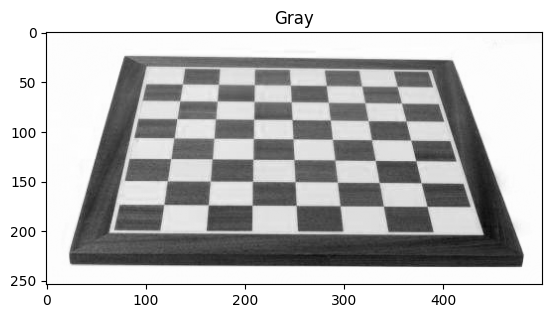

In [59]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('contour/2.jpg', gray)
plt.imshow(gray, cmap='gray')
plt.title('Gray')
plt.show()

# Harris Corner Detection

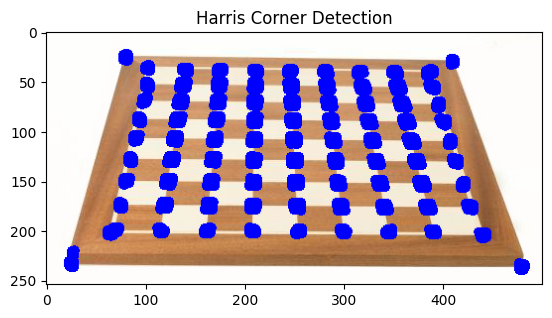

In [60]:
new_img = np.float32(gray)
dst = cv2.cornerHarris(new_img, 8, 3, 0.04)
dst = cv2.dilate(dst, None)

threshold = 0.01 * dst.max()
harris_mask = dst > threshold
pts_y, pts_x = np.where(harris_mask)
corners = np.vstack((pts_x, pts_y)).T

img_cpy = img.copy()

for x, y in corners:
    cv2.circle(img_cpy, (x, y), 3, (0, 0, 255), -1)

plt.imshow(img_cpy, cmap='gray')
plt.title('Harris Corner Detection')
plt.show()

# Findest Outer Most Points

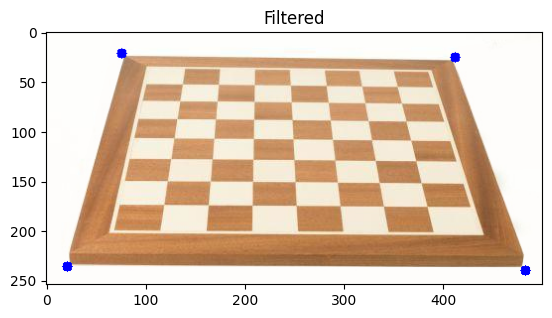

In [61]:
img_cpy2 = img.copy()

sum_coordinates = corners.sum(axis=1)
# for all pair [x, y] in the array calculate the difference (x - y) => return array in format [[diff_0], [diff_1], ..., [diff_n]]
diff_coordinates = np.diff(corners, axis=1)
# change array from [[diff_0], [diff_1], ..., [diff_n]] to [diff_0, diff_1, ..., diff_n]
diff_coordinates = diff_coordinates.reshape(-1)

top_left = corners[np.argmin(sum_coordinates)]      # np.argmin returns index of smallest value in arrays
top_right = corners[np.argmin(diff_coordinates)]
bottom_left = corners[np.argmax(diff_coordinates)]  # np.argmax returns index of biggest  value in arrays
bottom_right = corners[np.argmax(sum_coordinates)]

cv2.circle(img_cpy2, (top_left[0], top_left[1]), 5, (0, 0, 255), -1)
cv2.circle(img_cpy2, (top_right[0], top_right[1]), 5, (0, 0, 255), -1)
cv2.circle(img_cpy2, (bottom_left[0], bottom_left[1]), 5, (0, 0, 255), -1)
cv2.circle(img_cpy2, (bottom_right[0], bottom_right[1]), 5, (0, 0, 255), -1)

# Show image
plt.imshow(img_cpy2, cmap='gray')
plt.title('Filtered')
plt.show()

# Homography

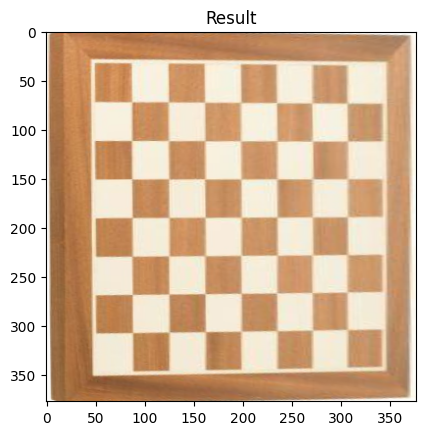

In [62]:
# Order points for homography
pts_1 = np.array([
    bottom_left,
    top_left,
    bottom_right,
    top_right,
], dtype=np.float32)

height, width, _ = img.shape
img_size = (height+width)//2
pts_2 = np.float32([[0, 0], [img_size, 0], [0, img_size], [img_size, img_size]])

# calculate matrix based on mapping pts_1 to pts_2
M = cv2.getPerspectiveTransform(pts_1, pts_2)

# apply homography
dst = cv2.warpPerspective(img, M, (img_size, img_size))

# Save image
dst = cv2.cvtColor(dst, cv2.COLOR_RGB2BGR)
cv2.imwrite('contour/7.jpg', dst)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.imshow(dst, cmap='gray')
plt.title('Result')
plt.show()